In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() #chaining

# RDD에서 다룰 수 있는 데이터 타입 TypeSafe
1. 비정형 데이터 - .... json, txt, str
2. 정형 데이터 - 리스트, csv, table

In [2]:
#RDD[str]
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1

learning_spark_data/log.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [3]:
rdd1.take(3)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS']

In [ ]:
#RDD[dict] - data.json

In [4]:
import json
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json').map(json.loads)
rdd2

PythonRDD[5] at RDD at PythonRDD.scala:53

In [5]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

In [8]:
spark.stop()

## RDD 의 데이터 읽기 패턴
1. RDD 생성 - type 지정 x
2. 형식 변환 - map()
3. take(n)

# 스파크컨텍스트 객체

1. SparkSession.getOrCreate() -> 세션객체로부터 사전에 설정된 변수에 맞춰 컨텍스트 생성
2. SparkConf + SparkContext -> 저수준 연산에 적합한 방식

In [6]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [ ]:
spark = SparkContext(conf = conf).getOrCreate()
#spark.stop()

In [11]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.executor.id', 'driver'),
 ('spark.app.submitTime', '1754024964931'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name', 'country-student-counts2'),


In [12]:
spark.stop()

In [13]:
import os
os.getcwd() # 컨테이너 내부 경로

'/home/jovyan/work'

In [14]:
dir = os.path.join( os.getcwd() , 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [15]:
filename = 'xAPI-Edu-Data.csv'
filepath = os.path.join( dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

## 외부저장소에서 데이터를 로드, RDD 생성

In [19]:
spark = SparkContext(conf = conf).getOrCreate()
#spark.stop()

In [20]:
lines = spark.textFile('file:///'+filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [22]:
lines.take(1)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class']

In [23]:
lines.count() #대용량일 경우 문제 -> take(n)

481

# 데이터의 처리

In [24]:
header = lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [25]:
datas = lines.filter(lambda row : row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [26]:
countries = datas.map(lambda row : row.split(',')[2])
countries

PythonRDD[7] at RDD at PythonRDD.scala:53

In [27]:
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [28]:
result = countries.countByValue() #집계
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [29]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [31]:
sorted(result.items(), key = lambda x: x[1], reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [34]:
total_su = sum(result.values()) #480명이다.
total_su

480

In [35]:
# 비율 계산
ratios = {k: round(v / total_su *100 ,2) for k,v in result.items() }
ratios

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

<BarContainer object of 14 artists>

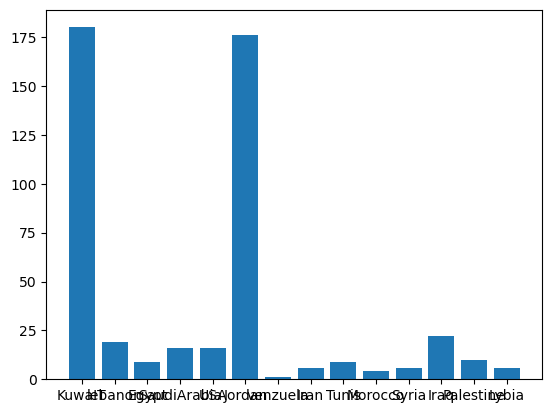

In [36]:
import matplotlib.pyplot as plt
countries = list(result.keys())
counts = list(result.values())
plt.xticks(rotation=-70)
plt.bar(countries, counts)

In [ ]:
# rdd 연습

In [37]:
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() 


In [38]:
# 2. RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

countries = spark.sparkContext.parallelize(data)
countries

ParallelCollectionRDD[10] at readRDDFromFile at PythonRDD.scala:289

In [40]:
# 소문자로 변환 lower()
countries_lower = countries.map(lambda x:x.lower())
countries_lower.take(5)

['kuwait', 'lebanon', 'jordan', 'jordan', 'usa']

In [41]:
# jordan 추출
jordan = countries_lower.filter(lambda x:x=='jordan')
jordan.collect()

['jordan', 'jordan', 'jordan']

In [43]:
# 몇개국인지 세어보세요 : distinct()> count()
unique_countries = countries_lower.distinct()
unique_countries.count()

6

In [ ]:
# 국가별 빈도수

In [44]:
data

['KuwaIT',
 'lebanon',
 'Jordan',
 'Jordan',
 'USA',
 'Egypt',
 'Jordan',
 'USA',
 'Iran',
 'Iran',
 'KuwaIT']

In [45]:
country_pairs = countries_lower.map(lambda x: (x,1))
country_pairs.take(1)

[('kuwait', 1)]

In [46]:
country_counts = country_pairs.reduceByKey(lambda a,b: a+b)
country_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [47]:
country_counts.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [48]:
country_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [50]:
country_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [51]:
country_counts.sortBy( lambda x:x[1], ascending=False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [52]:
countries.reduce(lambda a, b: a+','+b) #변환

'KuwaIT,lebanon,Jordan,Jordan,USA,Egypt,Jordan,USA,Iran,Iran,KuwaIT'

# 실습

In [7]:
spark.stop()

In [1]:
import os
os.getcwd() # 컨테이너 내부 경로
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

In [2]:
dir = os.path.join( os.getcwd() , 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [3]:
filename = 'mnm_dataset.csv'
filepath = os.path.join( dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/mnm_dataset.csv'

In [4]:
conf = SparkConf().setMaster('local').setAppName('practice_csv')
conf

In [5]:
spark = SparkContext(conf = conf).getOrCreate()

In [6]:
lines = spark.textFile('file:///'+filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/mnm_dataset.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [7]:
lines.take(1)

['State,Color,Count']

In [8]:
lines.count() #대용량일 경우 문제 -> take(n)

100000

In [9]:
header = lines.first()
header

'State,Color,Count'

In [10]:
datas = lines.filter(lambda row : row != header)
datas.take(3)

['TX,Red,20', 'NV,Blue,66', 'CO,Blue,79']

In [19]:
countries = datas.map(lambda row : row.split(',')[0])
countries

PythonRDD[6] at RDD at PythonRDD.scala:53

In [22]:
countries.take(10)

['TX', 'NV', 'CO', 'OR', 'WA', 'WY', 'CA', 'WA', 'OR', 'TX']

In [23]:
result = countries.countByValue() #집계
result

defaultdict(int,
            {'TX': 10072,
             'NV': 10025,
             'CO': 10051,
             'OR': 9903,
             'WA': 10065,
             'WY': 9782,
             'CA': 10164,
             'AZ': 10001,
             'NM': 10050,
             'UT': 9886})

In [24]:
sorted(result.items(), key = lambda x: x[1], reverse=True)[:3]

[('CA', 10164), ('TX', 10072), ('WA', 10065)]

<BarContainer object of 10 artists>

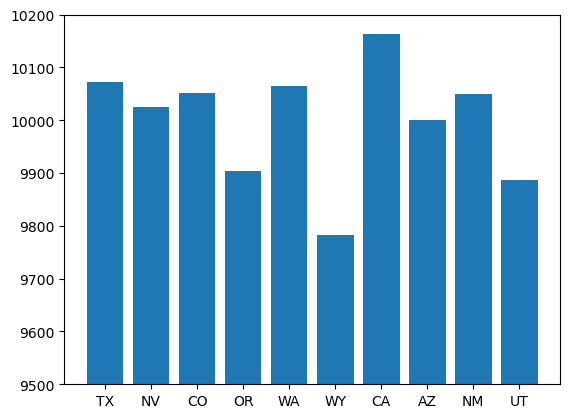

In [27]:
import matplotlib.pyplot as plt
countries = list(result.keys())
counts = list(result.values())
plt.ylim(9500, 10200)
plt.bar(countries, counts)

In [32]:
spark.stop()

In [11]:
# 1. (Key, Value) 쌍으로 만들기 (map)
#    - Key: row[0] (예: 'TX')
#    - Value: int(row[2]) (예: 20)
pair_rdd = datas.map(lambda row: (row[0], int(row[2])))

In [12]:
pair_rdd.take(3)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 4.0 failed 1 times, most recent failure: Lost task 0.0 in stage 4.0 (TID 4) (65897b4b5d1d executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 2849, in takeUpToNumLeft
    yield next(iterator)
          ^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_40309/2514633618.py", line 4, in <lambda>
ValueError: invalid literal for int() with base 10: ','

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:181)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:833)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:181)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 2849, in takeUpToNumLeft
    yield next(iterator)
          ^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_40309/2514633618.py", line 4, in <lambda>
ValueError: invalid literal for int() with base 10: ','

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:181)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more


In [46]:
# 2. Key를 기준으로 Value들을 더하기 (reduceByKey)
#    - (a, b)는 같은 Key에 속한 값들을 의미합니다.
sum_by_key_rdd = pair_rdd.reduceByKey(lambda a, b: a + b)

In [47]:
# 결과 확인 (Action)
result = sum_by_key_rdd.collect()
print(result)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 4.0 failed 1 times, most recent failure: Lost task 0.0 in stage 4.0 (TID 4) (65897b4b5d1d executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1237, in process
    out_iter = func(split_index, iterator)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 840, in func
    return f(iterator)
           ^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 3983, in combineLocally
    merger.mergeValues(iterator)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 256, in mergeValues
    for k, v in iterator:
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_37454/2514633618.py", line 4, in <lambda>
ValueError: invalid literal for int() with base 10: ','

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:833)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1046)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1045)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 1237, in process
    out_iter = func(split_index, iterator)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 840, in func
    return f(iterator)
           ^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/rdd.py", line 3983, in combineLocally
    merger.mergeValues(iterator)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 256, in mergeValues
    for k, v in iterator:
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_37454/2514633618.py", line 4, in <lambda>
ValueError: invalid literal for int() with base 10: ','

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
